# Win Predictor

## 1. Exploratory Data Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('past_election_dataset.csv')

In [30]:
df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score
0,1,0.0,0.524,0.476,0.8770,0.001283,0.006808,0.991908,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58,Mahinda (2015),0.990625
1,2,0.0,1.000,0.000,0.0000,0.085236,0.802499,0.112265,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58,Mahinda (2015),0.027029
2,3,0.0,0.000,1.000,0.7096,0.004070,0.112456,0.883474,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58,Mahinda (2015),0.879404
3,4,0.0,0.000,1.000,0.5859,0.115487,0.511504,0.373009,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58,Mahinda (2015),0.257521
4,5,0.0,0.145,0.855,0.7096,0.004989,0.096267,0.898744,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58,Mahinda (2015),0.893755


In [31]:
print(df)

      Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0      1      0.000      0.524      0.476          0.8770     0.001283   
1      2      0.000      1.000      0.000          0.0000     0.085236   
2      3      0.000      0.000      1.000          0.7096     0.004070   
3      4      0.000      0.000      1.000          0.5859     0.115487   
4      5      0.000      0.145      0.855          0.7096     0.004989   
..   ...        ...        ...        ...             ...          ...   
830  831      0.000      0.739      0.261          0.6486     0.335168   
831  832      0.000      0.862      0.138          0.5423     0.534187   
832  833      0.000      1.000      0.000          0.0000     0.007439   
833  834      0.265      0.582      0.153         -0.2732     0.440393   
834  835      0.082      0.687      0.232          0.6960     0.071773   

     roberta_neu  roberta_pos        date Candidate_name  \
0       0.006808     0.991908  12/31/2014        Ma

In [32]:
df.describe()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Election_year,Postal_data,Poll_data,Final_percentage,Sentiment_score
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,418.000000,0.040898,0.641315,0.317784,0.401411,0.171216,0.289577,0.539207,2017.610778,39.410443,40.384024,40.165485,0.367991
std,241.188032,0.095662,0.275043,0.287453,0.443282,0.265343,0.236950,0.377232,1.905597,16.842967,17.509919,17.541849,0.607681
min,1.000000,0.000000,0.000000,0.000000,-0.919400,0.000708,0.006808,0.001911,2015.000000,4.600000,4.310000,3.160000,-0.960106
25%,209.500000,0.000000,0.506000,0.088500,0.000000,0.004061,0.075372,0.116437,2015.000000,39.470000,40.450000,41.990000,-0.093520
50%,418.000000,0.000000,0.686000,0.258000,0.542300,0.018973,0.220087,0.667124,2019.000000,45.040000,45.460000,47.580000,0.636742
75%,626.500000,0.000000,0.841500,0.470500,0.751950,0.233642,0.473076,0.913846,2019.000000,51.040000,53.220000,51.280000,0.910481
max,835.000000,1.000000,1.000000,1.000000,0.991900,0.962147,0.910748,0.991908,2019.000000,52.610000,54.420000,52.250000,0.990625


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                835 non-null    int64  
 1   vader_neg         835 non-null    float64
 2   vader_neu         835 non-null    float64
 3   vader_pos         835 non-null    float64
 4   vader_compound    835 non-null    float64
 5   roberta_neg       835 non-null    float64
 6   roberta_neu       835 non-null    float64
 7   roberta_pos       835 non-null    float64
 8   date              835 non-null    object 
 9   Candidate_name    835 non-null    object 
 10  Comment           835 non-null    object 
 11  Election_year     835 non-null    int64  
 12  Postal_data       835 non-null    float64
 13  Poll_data         835 non-null    float64
 14  Final_percentage  835 non-null    float64
 15  Candidate_Year    835 non-null    object 
 16  Sentiment_score   835 non-null    float64
dt

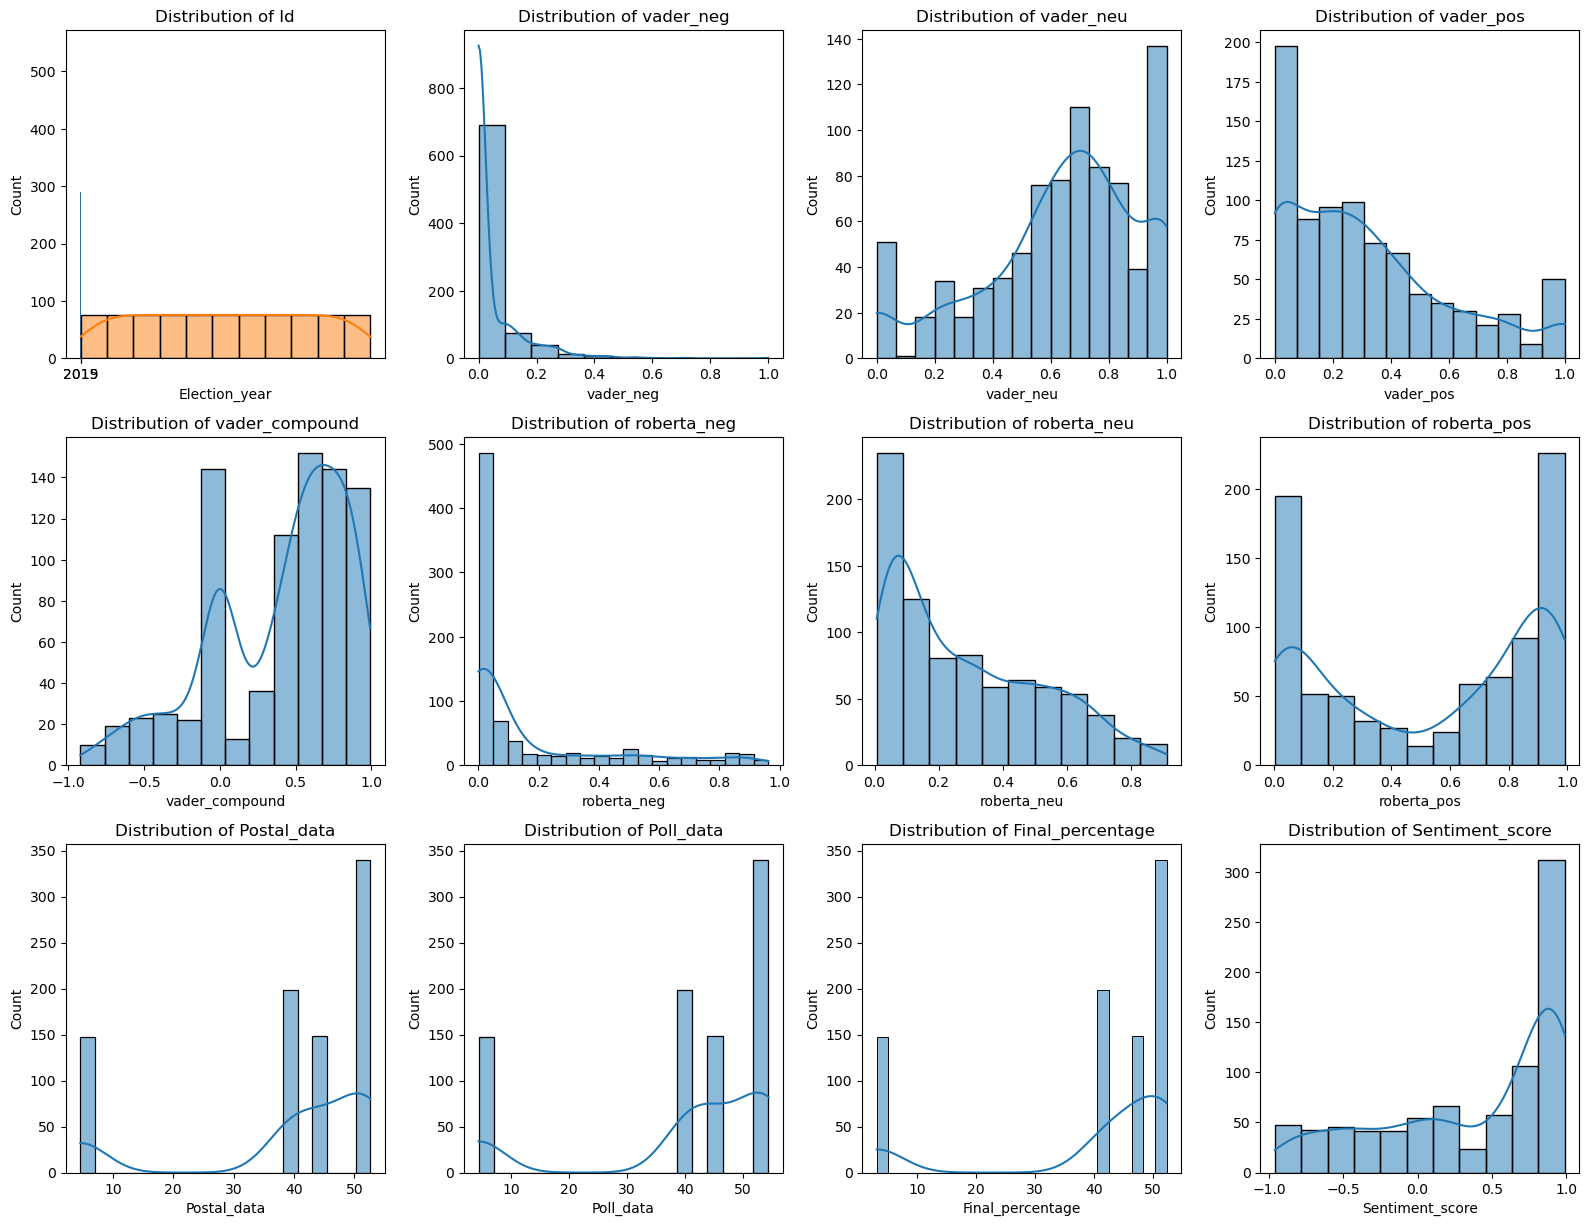

In [34]:

#visualize the distribution of each feature
#identify the qualitative and quantitative features

#set up the matplotlib figure
plt.figure(figsize=(16, 16))

#plot histograms for qualitative features
qualitative_features = [col for col in df.select_dtypes(include=['int64']).columns if df[col].nunique() <= 2]

for i, column in enumerate(qualitative_features, 1):
    if column!="Final_percentage":     #exclude the target variable
        plt.subplot(4, 4, i)
        sns.countplot(x=df[column], data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

#select quantitative features from all numerical features (qualitative+quantitative)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

quantitative_features = list()
for feature in numerical_features:
    if feature not in qualitative_features:
        quantitative_features.append(feature)

#plot histograms for quantitative features
for i, column in enumerate(quantitative_features, len(qualitative_features)):
    if column not in qualitative_features and i<=16:
        plt.subplot(4, 4, i)  #organize multiple plots in a single figure
        sns.histplot(df[column], kde=True)  #plot a histogram for the current column
        plt.title(f'Distribution of {column}')

#display figure with all subplots
plt.tight_layout()
plt.show()

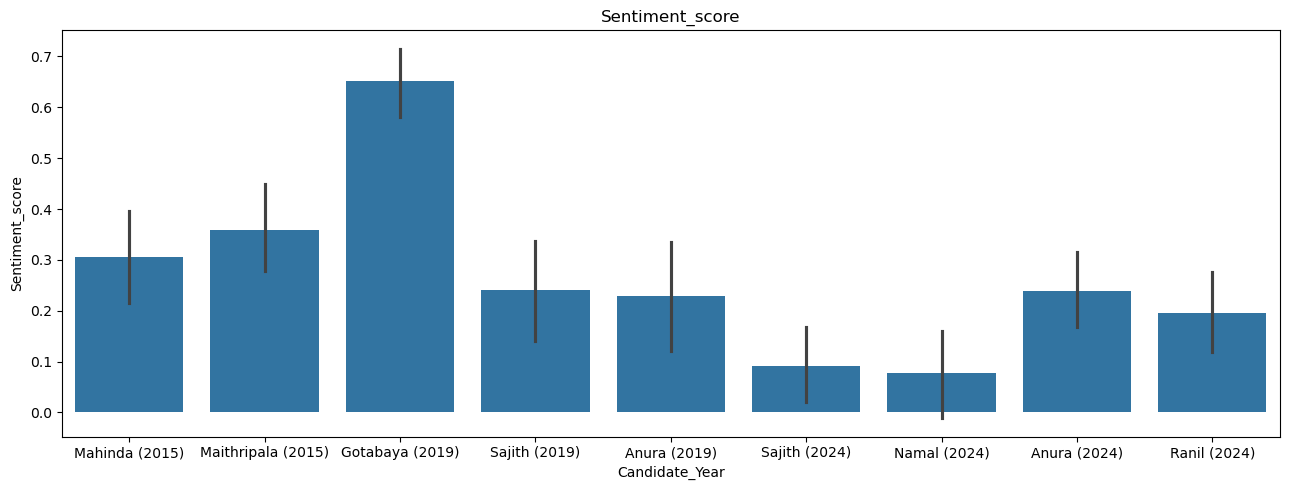

In [35]:
results_df = pd.read_csv('final_dataset_edited.csv')

fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.barplot(data=results_df, x='Candidate_Year', y='Sentiment_score', ax=axs)
axs.set_title('Sentiment_score')
plt.tight_layout()
plt.show()

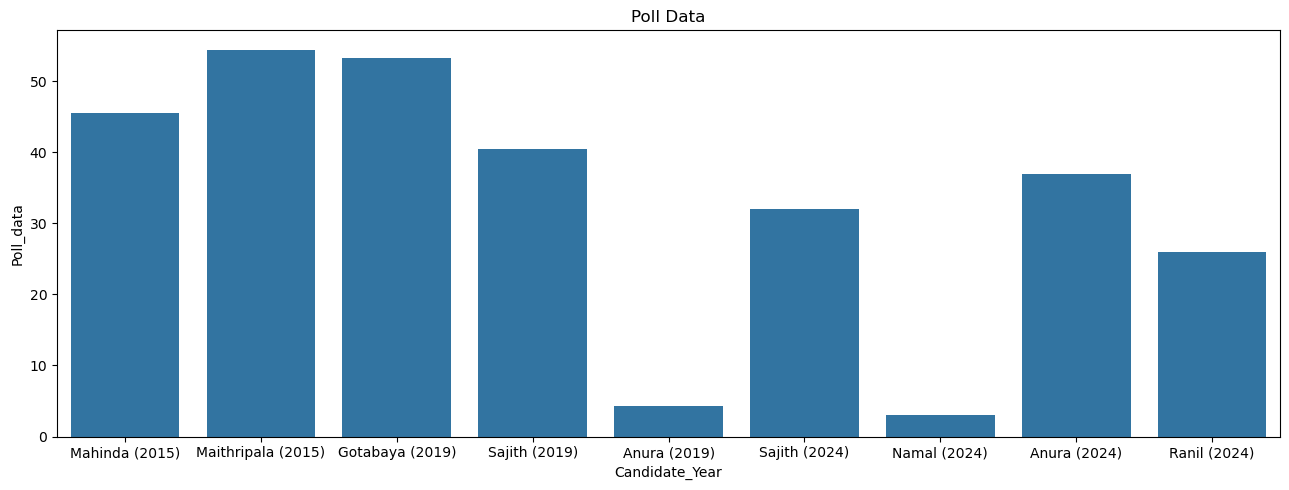

In [36]:
fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.barplot(data=results_df, x='Candidate_Year', y='Poll_data', ax=axs)
axs.set_title('Poll Data')
plt.tight_layout()
plt.show()

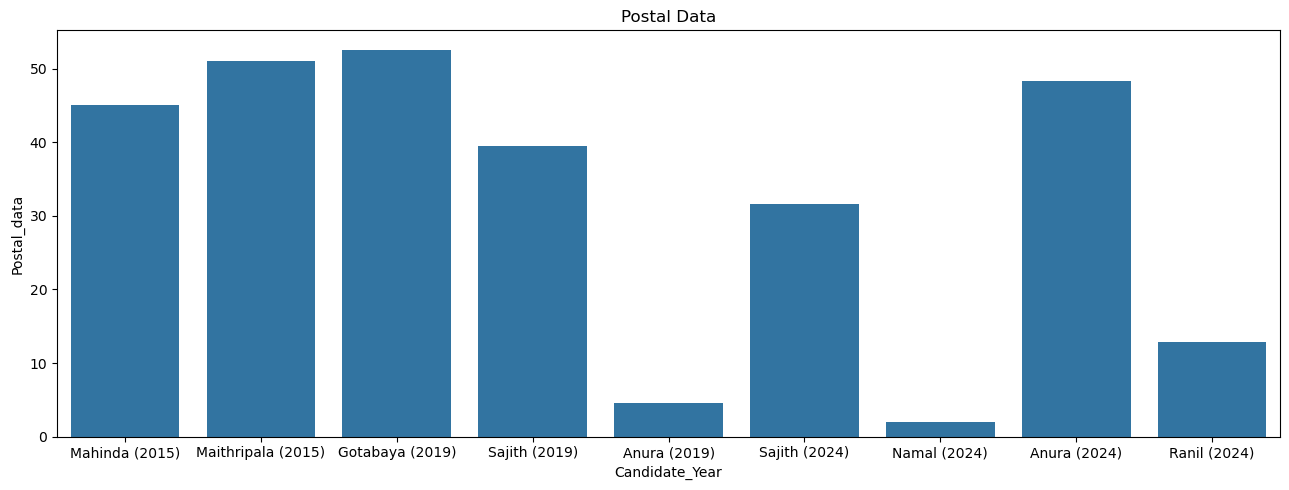

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.barplot(data=results_df, x='Candidate_Year', y='Postal_data', ax=axs)
axs.set_title('Postal Data')
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

### Handle Missing Values

In [38]:
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Id                  0
vader_neg           0
vader_neu           0
vader_pos           0
vader_compound      0
roberta_neg         0
roberta_neu         0
roberta_pos         0
date                0
Candidate_name      0
Comment             0
Election_year       0
Postal_data         0
Poll_data           0
Final_percentage    0
Candidate_Year      0
Sentiment_score     0
dtype: int64


### Encode Categorical Variables

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Candidate_Year_encoded'] = le.fit_transform(df['Candidate_Year'])

df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score,Candidate_Year_encoded
0,1,0.0,0.524,0.476,0.8770,0.001283,0.006808,0.991908,12/31/2014,Mahinda,Happy new year to you my king !!! All the best...,2015,45.04,45.46,47.58,Mahinda (2015),0.990625,2
1,2,0.0,1.000,0.000,0.0000,0.085236,0.802499,0.112265,12/31/2014,Mahinda,go sri lanka go...,2015,45.04,45.46,47.58,Mahinda (2015),0.027029,2
2,3,0.0,0.000,1.000,0.7096,0.004070,0.112456,0.883474,12/31/2014,Mahinda,Good luck .,2015,45.04,45.46,47.58,Mahinda (2015),0.879404,2
3,4,0.0,0.000,1.000,0.5859,0.115487,0.511504,0.373009,12/31/2014,Mahinda,win,2015,45.04,45.46,47.58,Mahinda (2015),0.257521,2
4,5,0.0,0.145,0.855,0.7096,0.004989,0.096267,0.898744,12/31/2014,Mahinda,"Good luck, president",2015,45.04,45.46,47.58,Mahinda (2015),0.893755,2


### Feature Selection

In [40]:
X = df[['Poll_data', 'Postal_data', 'Sentiment_score', 'Candidate_Year_encoded']]
y = df['Final_percentage']

### Split Dataset into Training and Testing Sets

In [41]:
#import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Model Building and Evaluation

In [42]:
test_df = pd.read_csv('present_election_dataset.csv')

In [43]:
test_df['Candidate_Year_encoded'] = le.fit_transform(test_df['Candidate_Year']) + 5
test_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,date,Candidate_name,Comment,Election_year,Postal_data,Poll_data,Final_percentage,Candidate_Year,Sentiment_score,Candidate_Year_encoded
0,836,0.000,0.687,0.313,0.6249,0.005144,0.492034,0.502823,8/31/2024,Sajith,Sajith Premadasa: For a future where Sri Lanka...,2024,31.57,32.0,NaN,Sajith (2024),0.497679,8
1,837,0.000,0.000,1.000,0.7096,0.004211,0.099162,0.896627,8/31/2024,Sajith,Good luck,2024,31.57,32.0,NaN,Sajith (2024),0.892416,8
2,838,0.423,0.192,0.385,-0.0516,0.331776,0.614095,0.054129,8/31/2024,Sajith,No chance raja,2024,31.57,32.0,NaN,Sajith (2024),-0.277647,8
3,839,0.360,0.400,0.240,-0.2263,0.473580,0.478779,0.047641,8/31/2024,Sajith,"Sir,please solve teachers salary problems.",2024,31.57,32.0,NaN,Sajith (2024),-0.425939,8
4,840,0.000,0.316,0.684,0.7579,0.004566,0.087601,0.907834,8/31/2024,Sajith,definitely you will win sir,2024,31.57,32.0,NaN,Sajith (2024),0.903268,8


In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 4.595397631404306e-27
R² Score: 1.0


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.4249273572736059
R² Score: 0.9986340607931772


In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that first creates polynomial features then fits a linear regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print(f'Polynomial Regression (Degree 2) - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression (Degree 2) - R² Score: {r2_poly}')

Polynomial Regression (Degree 2) - Mean Squared Error: 7.20654302061832e-26
Polynomial Regression (Degree 2) - R² Score: 1.0


In [47]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 4.645070725456171e-28
R² Score: 1.0


In [48]:
from sklearn.svm import SVR

# Create and train the SVR model
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.006159269456418515
R² Score: 0.9999802008802401


## 4. Make Predictions from the Trained Model

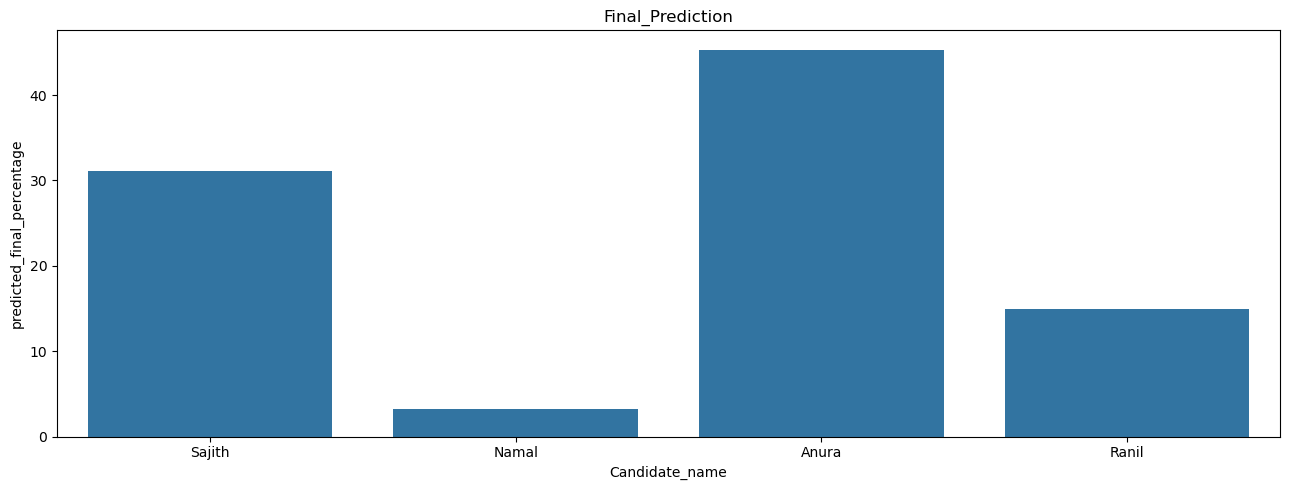

In [49]:
import joblib
joblib.dump(model, 'final_percentage_predictor.pkl')

# Load the trained model
model = joblib.load('final_percentage_predictor.pkl')

# Make predictions
# Ensure that you're using the correct columns for prediction
test_predictions = model.predict(test_df[['Poll_data', 'Postal_data', 'Sentiment_score', 'Candidate_Year_encoded']])

# Add predictions to the test dataframe
test_df['predicted_final_percentage'] = test_predictions

fig, axs = plt.subplots(1, 1, figsize=(13, 5))
sns.barplot(data=test_df, x='Candidate_name', y='predicted_final_percentage', ax=axs)
axs.set_title('Final_Prediction')
plt.tight_layout()
plt.show()